<a href="https://colab.research.google.com/github/coderhetal/Music-genre-classification-/blob/main/MUSIC_GENRE_CLASSIFICATION_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSIC GENRE CLASSIFICATION**

#Loading data :

In [1]:
#loading data
!wget 'download.zip'   'https://osf.io/drjhb/download'

--2023-06-14 06:00:14--  http://download.zip/
Resolving download.zip (download.zip)... 76.76.21.21
Connecting to download.zip (download.zip)|76.76.21.21|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://download.zip/ [following]
--2023-06-14 06:00:14--  https://download.zip/
Connecting to download.zip (download.zip)|76.76.21.21|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://www.download.zip/ [following]
--2023-06-14 06:00:14--  https://www.download.zip/
Resolving www.download.zip (www.download.zip)... 76.76.21.164, 76.76.21.98
Connecting to www.download.zip (www.download.zip)|76.76.21.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31964 (31K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]  31.21K  --.-KB/s    in 0s      

2023-06-14 06:00:19 (193 MB/s) - ‘index.html’ saved [31964/31964]

--2023-06-14 06:00:19--  https:

#Unzipping the data :

In [2]:
#unzipping the data
!unzip '/content/download'


Archive:  /content/download
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wav  
  inflating: Data/genre

#Importing the library

In [3]:
#importing the library
import os
# Interact with the operating system for file and directory manipulation.
import matplotlib.pyplot as plt
# Create visualizations and plots in Python.

import torch
# Machine learning library with tensor operations and neural network support.
import torchaudio
 # Audio processing library built on top of PyTorch for working with audio data.

import torch.nn as nn
 # Module for defining and working with neural networks in PyTorch.
import gc
 # Garbage collection module for memory management and resource cleanup.

import torch.nn.functional as F
# Functional interface for neural network operations in PyTorch.
from torchvision.datasets import ImageFolder
 # Dataset class for loading image data, particularly useful for image classification.

import torchvision.transforms as transforms
# Preprocessing transformations for images, such as resizing and normalization.
from torch.utils.data import DataLoader
 # Data loading utility for creating mini-batches during training.




#Check if CUDA is available

In [4]:
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev)
print(f"Using {device} device")
print(torch.cuda.get_device_name(torch.cuda.current_device()))

Using cuda:0 device
Tesla T4


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#plotting the spectogram

In [5]:
#plotting the spectogram
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    #figure.suptitle(title)
    #plt.show(block=False)

#Creating directories and splitting data in train and test :

In [6]:
l = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]


Creating directories for test and train set

In [7]:
os.mkdir('/content/Train_image/')
for i in range(0,10):
  os.mkdir('/content/Train_image/' + l[i])

os.mkdir('/content/Test_image')
for i in range(0,10):
  os.mkdir('/content/Test_image/' + l[i])

Plotting spectrograms for train set and adding in directory

In [8]:
#Plotting Training Spectrograms
for i in range(0,10):

  dir_path = '/content/Data/genres_original/' + l[i]
  lst1 = os.listdir(dir_path)
  os.chdir('/content/Train_image/' + l[i])

  for j in range(0,90):
    path = dir_path + '/' + lst1[j]

    if path != '/content/Data/genres_original/jazz/jazz.00054.wav':

      waveform , sample_rate = torchaudio.load(path)

      plot_specgram(waveform, sample_rate, lst1[j])
      plt.savefig(lst1[j] + '.png')
      plt.close()

    else:
      pass

gc.collect()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


205

Plotting spectrograms for test set and adding in directory

In [9]:
#Plotting Testing Spectrograms
for i in range(0,10):

  dir_path = '/content/Data/genres_original/' + l[i]
  lst1 = os.listdir(dir_path)
  os.chdir('/content/Test_image/' + l[i])

  for j in range(90,100):
    path = dir_path + '/' + lst1[j]

    if path != '/content/Data/genres_original/jazz/jazz.00054.wav':

      waveform , sample_rate = torchaudio.load(path)

      plot_specgram(waveform, sample_rate, lst1[j])
      plt.savefig(lst1[j] + '.png')
      plt.close()

    else:
      pass

gc.collect()

2847089

#Dataloader

In [10]:
'''#DATALOADER
tran = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])
data_set = ImageFolder('/content/Train_image/', transform = tran)
data =DataLoader(data_set, batch_size =128, shuffle=True)'''

"#DATALOADER\ntran = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])\ndata_set = ImageFolder('/content/Train_image/', transform = tran)\ndata =DataLoader(data_set, batch_size =128, shuffle=True)"

#CNN Model

In [11]:
#CNN MODEL
class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.C1=nn.Sequential(
            nn.Conv2d(3,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.C2=nn.Sequential(
            nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)

    )
    self.C3=nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.L1=nn.Linear(32*32*64,4096)
    self.L2=nn.Linear(4096,2048)
    self.L3=nn.Linear(2048,1024)
    self.L4=nn.Linear(1024,512)
    self.L5=nn.Linear(512,10)

  def forward(self, x):
    x=self.C1(x)
    x=self.C2(x)
    x=self.C3(x)
    x=x.reshape(x.size(0),-1)
    x=F.relu(self.L1(x))
    x=F.relu(self.L2(x))
    x=F.relu(self.L3(x))
    x=F.relu(self.L4(x))
    x=(self.L5(x))
    return F.log_softmax(x)

#Normalizing :

In [26]:
#Checking Image Dimensions
import torchvision
import matplotlib.image as mpimg
#Checking Image Dimensions
img = mpimg.imread('/content/Train_image/blues/blues.00034.wav.png')
print(img.shape)
#Mean and Deviation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
#Loading Normalised Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std), transforms.Resize((256,256))])
data_set = torchvision.datasets.ImageFolder('/content/Train_image/', transform = transform)
data = DataLoader(data_set, batch_size = 100, shuffle = True)

(480, 640, 4)


In [27]:
net=Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
loss_fn=nn.CrossEntropyLoss()

optimizer

In [28]:

#OPTIMIZER
optimizer = torch.optim.Adam(net.parameters(), lr=0.002)


In [29]:
epoch=100

#Training model:

In [30]:
#TRAINING
l=[]
accuracy=[]
e=[]

for j in range(epoch):
  torch.cuda.empty_cache()
  gc.collect()
  for i, (img,lbl) in enumerate(data):
    img = img.to(device)
    lbl = lbl.to(device)
    out=net(img)
    loss=loss_fn(out,lbl)
    l.append(float(loss))
    total=lbl.size(0)
    _, predicted = torch.max(out.data , 1)
    correct = (predicted == lbl).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if i%10 == 0:
      print(loss)
      print(acc)
    #predicted=torch.max(out.data,1)
    loss = loss_fn(out,lbl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

<ipython-input-11-05f6663e9d90>:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


tensor(2.3025, device='cuda:0', grad_fn=<NllLossBackward0>)
7.0
tensor(2.7247, device='cuda:0', grad_fn=<NllLossBackward0>)
10.0
tensor(2.2195, device='cuda:0', grad_fn=<NllLossBackward0>)
21.0
tensor(2.0595, device='cuda:0', grad_fn=<NllLossBackward0>)
23.0
tensor(2.0487, device='cuda:0', grad_fn=<NllLossBackward0>)
22.0
tensor(2.0142, device='cuda:0', grad_fn=<NllLossBackward0>)
24.0
tensor(1.8449, device='cuda:0', grad_fn=<NllLossBackward0>)
28.0
tensor(2.1946, device='cuda:0', grad_fn=<NllLossBackward0>)
27.0
tensor(1.8138, device='cuda:0', grad_fn=<NllLossBackward0>)
37.0
tensor(1.6505, device='cuda:0', grad_fn=<NllLossBackward0>)
33.0
tensor(1.7292, device='cuda:0', grad_fn=<NllLossBackward0>)
39.0
tensor(1.7206, device='cuda:0', grad_fn=<NllLossBackward0>)
27.0
tensor(1.5105, device='cuda:0', grad_fn=<NllLossBackward0>)
39.0
tensor(1.6762, device='cuda:0', grad_fn=<NllLossBackward0>)
41.0
tensor(1.5571, device='cuda:0', grad_fn=<NllLossBackward0>)
45.0
tensor(1.5031, device='cud

#Plots:

In [41]:
print(accuracy)

[6.0, 46.0, 75.0, 98.0, 99.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


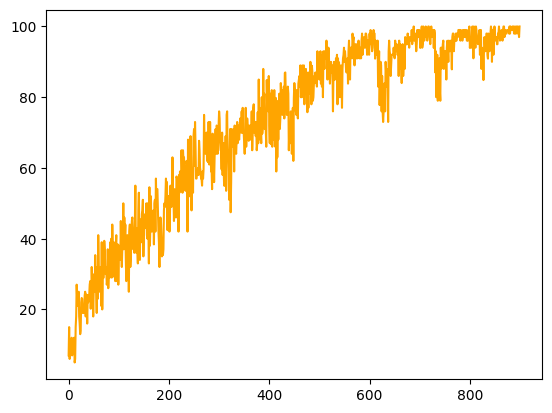

In [31]:
#PLOTTING ACCURACY
plt.plot(accuracy,"orange")


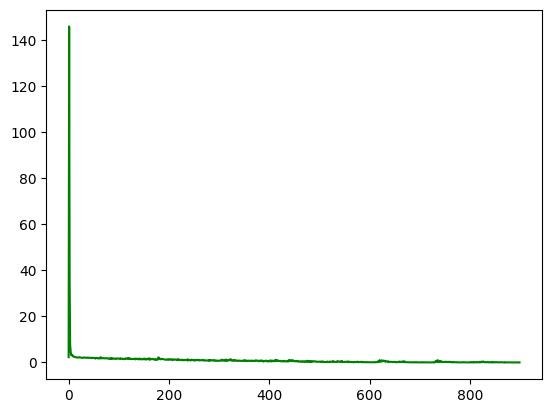

In [32]:
#PLOTTING LOSS
plt.plot(l,"green")

#Testing data :

#TEST SET DATALOADER

In [33]:
#TEST SET DATALOADER
tran = transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])
data_set = ImageFolder('/content/Test_image/', transform = tran)
data =DataLoader(data_set, batch_size =100, shuffle=True)

#Determining accuracy for test set

In [34]:
#TESTING
l=[]
accuracy=[]


for j in range(1):
  torch.cuda.empty_cache()
  gc.collect()
  for i, (img,lbl) in enumerate(data):
    img = img.to(device)
    lbl = lbl.to(device)
    out=net(img)
    loss=loss_fn(out,lbl)
    l.append(float(loss))
    total=lbl.size(0)
    _, predicted = torch.max(out.data , 1)
    correct = (predicted == lbl).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if i%10 == 0:
      print(loss)
      print(acc)
    #predicted=torch.max(out.data,1)
    #loss = loss_fn(out,lbl)
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()

tensor(1.5237, device='cuda:0', grad_fn=<NllLossBackward0>)
72.0


<ipython-input-11-05f6663e9d90>:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


#Downloading ResNet18

In [35]:
import torch
from torchvision import models

In [36]:
#Downloading ResNet18
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 10) #(num_of_class == 10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = torch.optim.Adam(model.parameters())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


In [37]:
#@title Training ResNet18
loss_func = []
accuracy = []

for i in range(0,20):
  model.train()
  torch.cuda.empty_cache()
  gc.collect()
  for k, (images,labels) in enumerate(data):
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)
    loss = criterion(output, labels)
    loss_func.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if k%10 == 0:
      print(loss)
      print(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor(2.3623, device='cuda:0', grad_fn=<NllLossBackward0>)
6.0
tensor(1.5446, device='cuda:0', grad_fn=<NllLossBackward0>)
46.0
tensor(0.9015, device='cuda:0', grad_fn=<NllLossBackward0>)
75.0
tensor(0.3308, device='cuda:0', grad_fn=<NllLossBackward0>)
98.0
tensor(0.1656, device='cuda:0', grad_fn=<NllLossBackward0>)
99.0
tensor(0.0305, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
tensor(0.0014, d

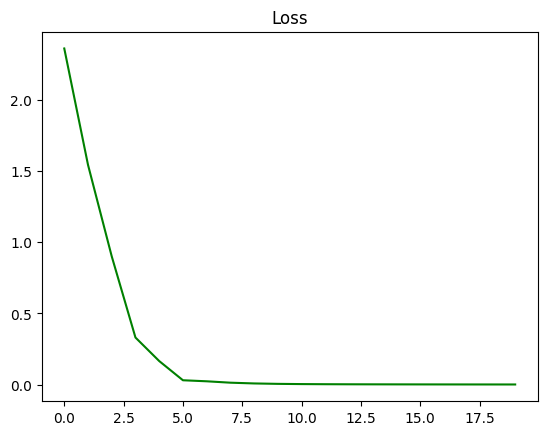

In [43]:
#@title Plotting Loss for ResNet18
plt.plot(loss_func,"green")
plt.title("Loss")
plt.show()

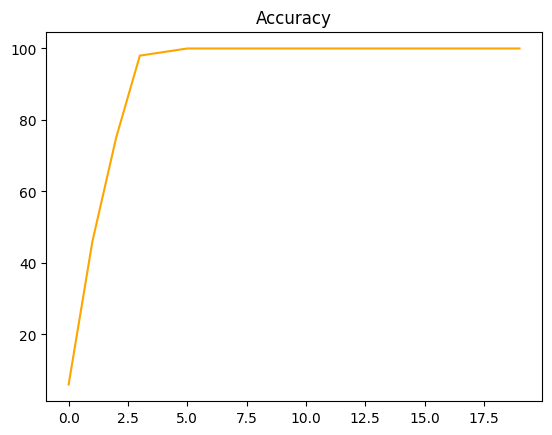

In [44]:
#@title Plotting Accuracy for ResNet18
plt.plot(accuracy,"orange")
plt.title("Accuracy")
plt.show()

In [40]:
#@title Checking Test Accuracy for ResNet18
for k, (img,lab) in enumerate(data):
    img = img.to(device)
    lab = lab.to(device)
    output = model(img)
    loss = criterion(output, lab)
    total = lab.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == lab).sum().item()
    acc = correct*100/total
    print(loss)
    print(acc)

tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
100.0
